In [127]:
import ugradio
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq, fftshift, ifftshift
from scipy import signal as sig

In [128]:
def extractData(filename):
    prefix = "ugastro\\Lab1Data\\"
    raw_data = np.load(prefix + filename)
    windowed_data = windowData(removeBuffer(raw_data['time_data']))
    return normalize(windowed_data)

def removeBuffer(data):
    return data[2:3][0]

def windowData(data):
    return data[0:]

def normalize(data):
    return (data - np.mean(data))

In [129]:
data_480_900 = extractData("Section5_2\\lab_1_data_480khz_900khz.npz")
data_480_950 = extractData("Section5_2\\lab_1_data_480khz_900khz.npz")
data_480_1000 = extractData("Section5_2\\lab_1_data_480khz_1000khz.npz")
data_480_1300 = extractData("Section5_2\\lab_1_data_480khz_1300khz.npz")
data_480_2000 = extractData("Section5_2\\lab_1_data_480khz_2000khz.npz")
data_480_3000 = extractData("Section5_2\\lab_1_data_480khz_3000khz.npz")
data_480_3100 = extractData("Section5_2\\lab_1_data_480khz_1000khz.npz")

data_200_1000 = extractData("Section5_2\\lab_1_data_200khz_1000khz.npz")
data_200_1500 = extractData("Section5_2\\lab_1_data_200khz_1500khz.npz")
data_200_2000 = extractData("Section5_2\\lab_1_data_200khz_2000khz.npz")
data_200_3000 = extractData("Section5_2\\lab_1_data_200khz_3000khz.npz")

data_400_3100 = extractData("Section5_5\\lab_1_data_400khz_3100khz.npz")
data_401500_3100 = extractData("Section5_5\\lab_1_data_401500hz_3100khz.npz")
data_401750_3100 = extractData("Section5_5\\lab_1_data_401750hz_3100khz.npz")
data_402000_3100 = extractData("Section5_5\\lab_1_data_402000hz_3100khz.npz")
data_403000_3100 = extractData("Section5_5\\lab_1_data_403000hz_3100khz.npz")

times = windowData([i / 1e3 for i in range(0, 2048)])

In [130]:
def printDataBlocks(dataset):
    n = len(dataset)
    fig, axs = plt.subplots(1, n, figsize=(18, 6))

    for i in range(0, n):
        axs[i].plot(times, data_480_1000[i])
        axs[i].set_xlabel("Time (ms)")
        axs[i].set_ylabel("Measured Voltage / Counts")

    plt.tight_layout()
    plt.show()

In [131]:
def graphAllTimeData(datasets, labels, signal):
    n = len(datasets)
    fig, axs = plt.subplots(1, n, figsize=(25, 6))

    for i, data in enumerate(datasets):
        axs[i].plot(times, data, label=labels[i], alpha=1)
        axs[i].scatter(times, data, alpha=1)
        axs[i].grid(True, alpha=0.3)
        axs[i].set_xlabel("Time (ms)")
        axs[i].set_ylabel("Measured Voltage / Counts")
        axs[i].set_title(f"{signal} Signal w/ {labels[i]} Sample Rate")

    plt.tight_layout()
    plt.show()

In [132]:
def graphOverlayTimeData(datasets, labels, signal):
    plt.figure(figsize=(12,8))

    for i, data in enumerate(datasets):
        plt.plot(times, data, label=labels[i], alpha=1)
        plt.scatter(times, data, s=10)

    plt.xlabel("Time (ms)")
    plt.ylabel("Measured Voltage / Counts")
    plt.title(f"Analysis of {signal} Signal w/ Different Sample Rates", size=20)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [133]:
def graphAllPowerSpectra(datasets, sample_rates, labels, signal):
    n = len(datasets)
    fig, axs = plt.subplots(1, n, figsize=(25, 6))

    for i, data in enumerate(datasets):
        fft_data = fft(data)
        fft_data_shifted = fftshift(fft_data)
        freq_bins = fftshift(fftfreq(len(times), d=1/sample_rates[i]))

        power_spectrum = abs(fft_data_shifted) ** 2

        axs[i].plot(freq_bins / 1e3, power_spectrum /1e5, label=f"{sample_rates[i]} kHz", alpha=1)        
        axs[i].set_xlabel("Frequency (kHz)")
        axs[i].set_ylabel("Power Spectral Density (10^5)")
        axs[i].set_title(f"FT of {signal} Signal w/ {labels[i]}", size=10)
        axs[i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def graphOverlayPowerSpectra(datasets, sample_rates, labels, signal):
    plt.figure(figsize=(12,8))

    for i, data in enumerate(datasets):
        fft_data = fft(data)
        fft_data_shifted = fftshift(fft_data)
        freq_bins = fftshift(fftfreq(len(times), d=1/sample_rates[i]))

        power_spectrum = abs(fft_data_shifted) ** 2
        plt.plot(freq_bins / 1e3, power_spectrum /1e5, label=f"{labels[i]}", alpha=1)

    plt.xlim(-600, 600)
    plt.xlabel("Frequency (kHz)")
    plt.ylabel("Power Spectral Density (10^5)")
    plt.title(f"Power Spectra of {signal} Signal w/ Different Sample Rates", size=20)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def graphOverlayPowerSpectraOneSided(datasets, sample_rates, labels, signal):
    plt.figure(figsize=(12,8))
    mid = len(times) // 2

    for i, data in enumerate(datasets):
        fft_data = fft(data)
        fft_data_shifted = fftshift(fft_data)[mid:]
        freq_bins = fftshift(fftfreq(len(times), d=1/sample_rates[i]))[mid:]

        power_spectrum = 2 * (abs(fft_data_shifted) ** 2)
        plt.plot(freq_bins / 1e3, power_spectrum /1e5, label=f"{labels[i]}", alpha=1)

    plt.xlim(300, 500)
    plt.xlabel("Frequency (kHz)")
    plt.ylabel("Power Spectral Density (10^5)")
    plt.title(f"One Sided Power Spectra of {signal} Signal w/ Different Sample Rates", size=20)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [134]:
def graphVoltageSpectra(datasets, sample_rates, labels, signal):
    fig, axs = plt.subplots(1, 2, figsize=(18, 8))

    for i, type in enumerate(['Real', 'Imaginary']):
        for j, data in enumerate(datasets):
            fft_data = fft(data)
            fft_data_shifted = fftshift(fft_data)
            freq_bins = fftshift(fftfreq(len(times), d=1/sample_rates[j]))

            if type == 'Real':
                voltage_spectrum = fft_data_shifted.real
            else:
                voltage_spectrum = fft_data_shifted.imag

            axs[i].plot(freq_bins / 1e3, voltage_spectrum, label=f"{labels[j]}", alpha=1)
        axs[i].set_xlim(-600, 600)
        axs[i].set_xlabel("Frequency (kHz)")
        axs[i].set_ylabel("Voltage")
        axs[i].set_title(f"{type} Voltage Spectra of {signal} Signal w/ Different Sample Rates", size=10)
        axs[i].legend()
        axs[i].grid(True, alpha=0.3)

    plt.show()

In [139]:
def graphInverseFTPowerSpectra(datasets, labels, signal):
    plt.figure(figsize=(12,8))

    for i, data in enumerate(datasets):
        fft_data = fft(data)
        fft_data_shifted = fftshift(fft_data)

        power_spectrum = abs(fft_data_shifted) ** 2

        ifft_data = ifft(power_spectrum)
        ifft_data_shifted = ifftshift(ifft_data)
        
        plt.plot(times, ifft_data_shifted.real, label=f"{labels[i]}", alpha=1)
        
    plt.xlabel("Lag (?)")
    plt.ylabel("Autocorrelation (?)")
    plt.title(f"Inverse FT of {signal} Signal Power Spectra w/ Different Sample Rates", size=20)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [136]:
def graphACF(datasets, labels, signal):
    plt.figure(figsize=(12, 8))
    lags = np.arange(-len(datasets[0]) + 1, len(datasets[0]))

    for i, data in enumerate(datasets):
        acf = sig.correlate(data, data, mode='full') / len(data)
        plt.plot(lags, acf, label=f"{labels[i]}", alpha=1)
        
    plt.xlabel("Lag (?)")
    plt.ylabel("Autocorrelation (?) ")
    plt.title(f"Autocorrelation of {signal} Signal w/ Different Sample Rates", size=20)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [137]:
def graphDFT(data, label, vsamp, xlim=None, ylim=None):
    plt.figure(figsize=(12,8))
    f_high_res = np.linspace(-vsamp / 2, vsamp / 2, num=10*len(data), endpoint=False)

    f, dft_data = ugradio.dft.dft(xt=data, vsamp=2)
    dft_data = fftshift(dft_data)
    power_spectrum = abs(dft_data) ** 2
    power_spectrum_db = 10 * np.log10(power_spectrum)

    print(f)

    plt.plot(f, power_spectrum_db)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power Spectral Density (dB)")
    plt.title(f"DFT of {label} Signal", size=20)

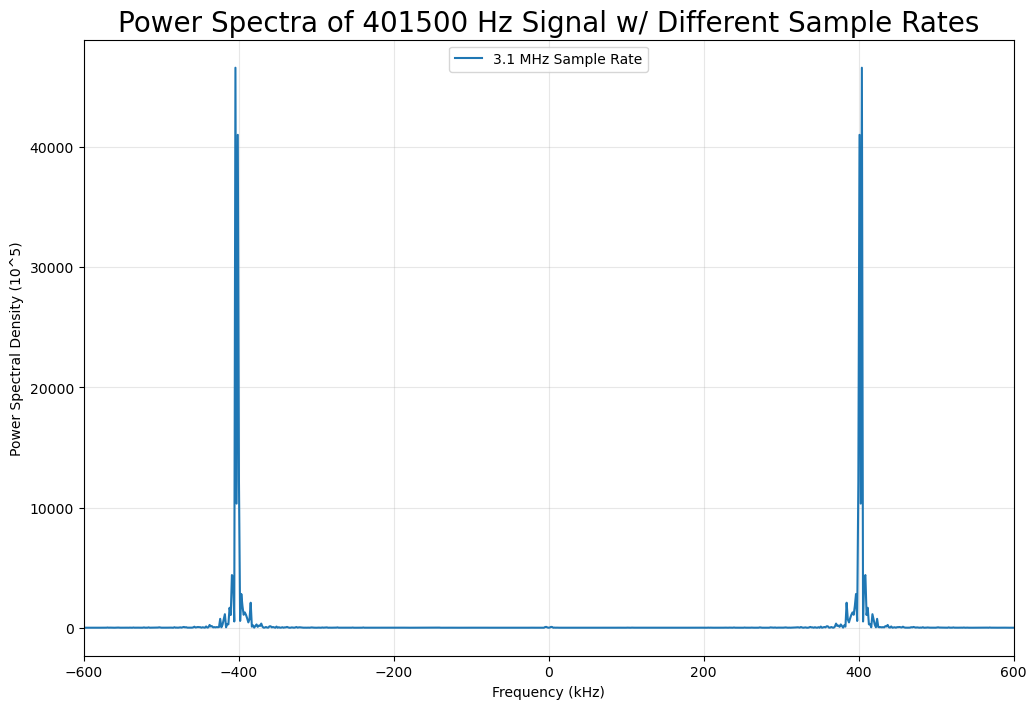

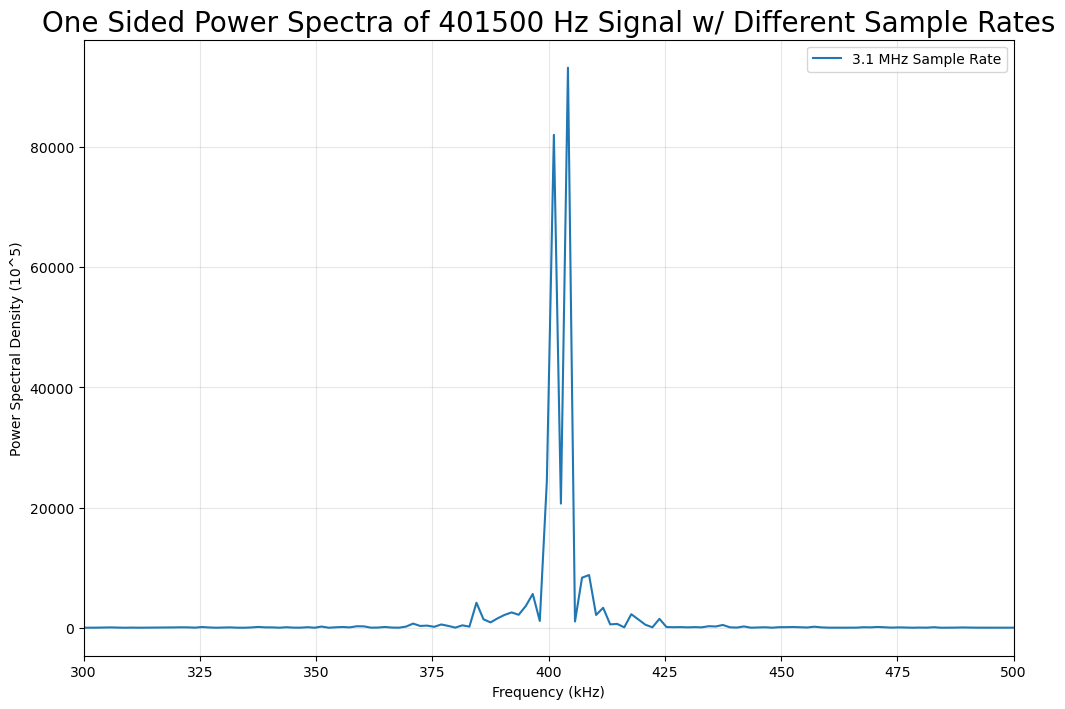

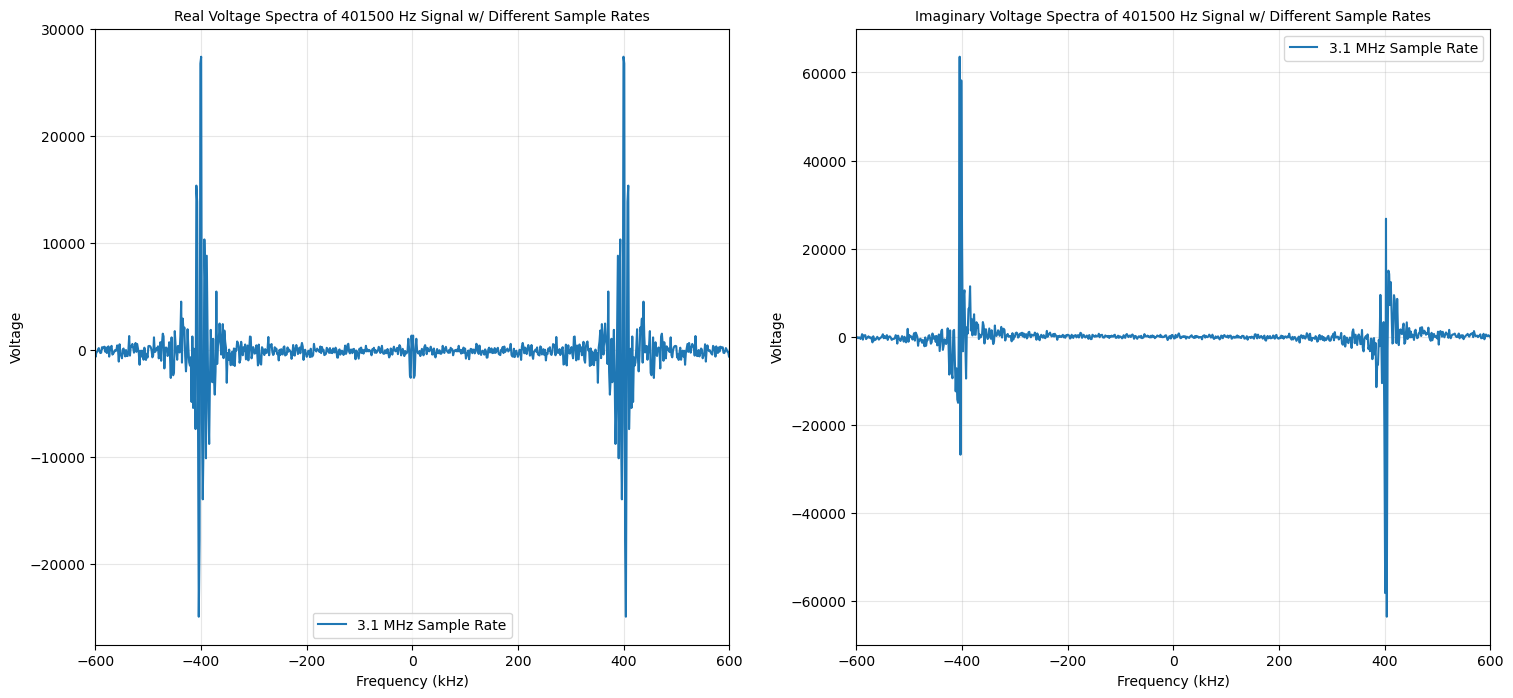

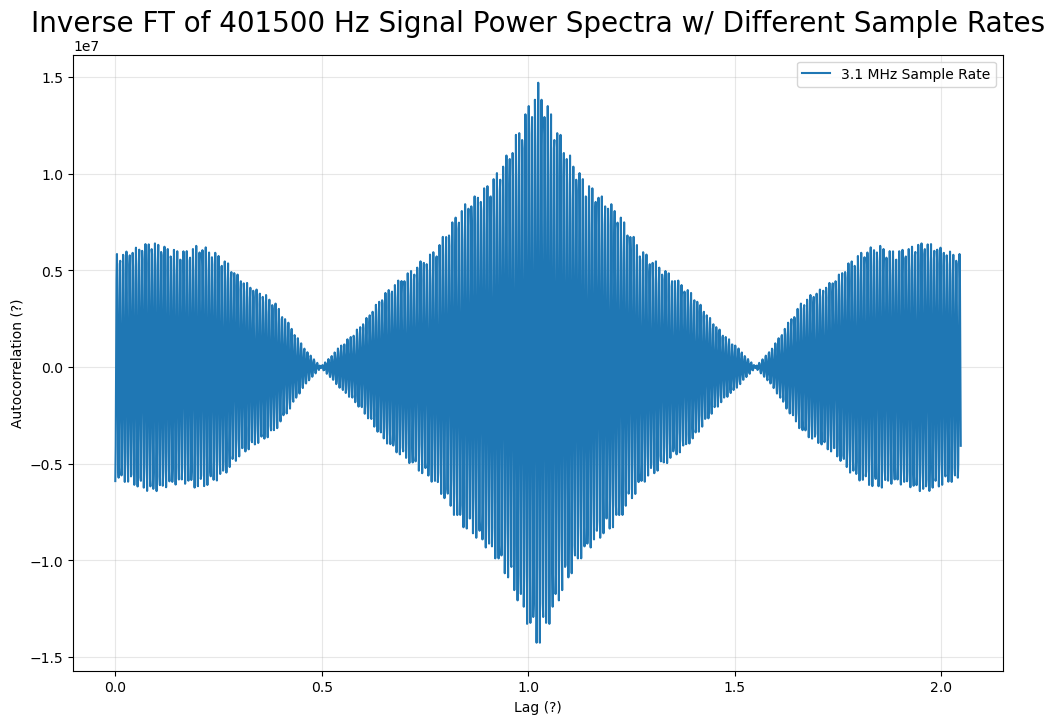

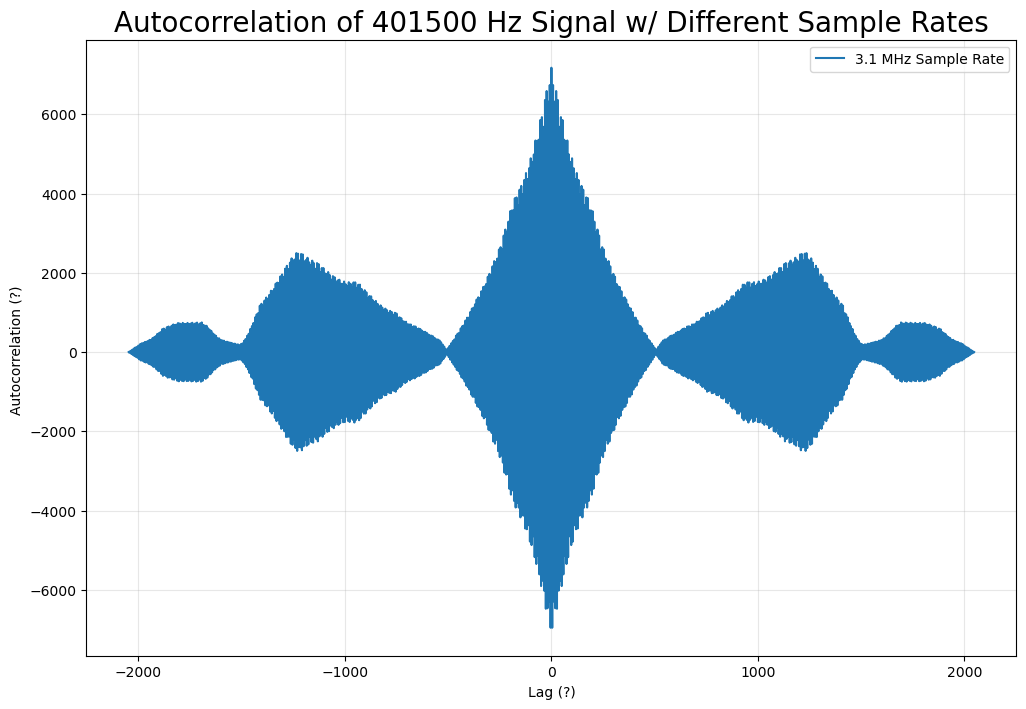

In [140]:
#datasets = [data_480_900, data_480_1000, data_480_1300, data_480_2000]
#sample_rates = [0.9e6, 1.0e6, 1.3e6, 2.0e6]
#labels = ["0.9 MHz Sample Rate", "1.0 MHz Sample Rate", "1.3 MHz Sample Rate", "2.0 MHz Sample Rate"]
#signal = "480 kHz"

datasets = [data_401750_3100]#, data_402000_3100]
sample_rates = [3.1e6]#, 3.1e6, 3.1e6]
labels = ["3.1 MHz Sample Rate"]#, "3.1 MHz Sample Rate", "3.1 MHz Sample Rate"]
signal = "401500 Hz"

#graphAllTimeData(datasets, labels, signal)
#graphOverlayTimeData(datasets[:-2], labels, signal)

#graphAllPowerSpectra(datasets, sample_rates, labels, signal)
graphOverlayPowerSpectra(datasets, sample_rates, labels, signal)
graphOverlayPowerSpectraOneSided(datasets, sample_rates, labels, signal)

graphVoltageSpectra(datasets, sample_rates, labels, signal) 

graphInverseFTPowerSpectra(datasets, labels, signal)
graphACF(datasets, labels, signal)

#graphDFT(data_480_2000, "480 kHz", 2.0e6)